## DATASETS

In [18]:
!tar -xzvf final-quotes-scraped.zip

x finalQuotes.csv


In [23]:
!move finalQuotes.csv data/finalQuotes.csv

Se han movido         1 archivos.


### CHECKING DATASET

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

In [4]:
df = pd.read_csv('data/train.csv')
df.head()
df = df.drop(columns=['id'])

In [5]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [6]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
print(df[df["cut"] == "Ideal"].price.mean())
print(df[df["cut"] == "Premium"].price.mean())
print(df[df["cut"] == "Very Good"].price.mean())
print(df[df["cut"] == "Good"].price.mean())
print(df[df["cut"] == "Fair"].price.mean())

7.635867669729187
7.9535179417738275
7.793194586199215
7.8515310796074225
8.107748562037795


In [8]:
df.cut.unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [9]:
df.color.unique()

array(['G', 'H', 'J', 'F', 'E', 'I', 'D'], dtype=object)

In [10]:
print(df[df["color"] == "G"].price.mean())
print(df[df["color"] == "H"].price.mean())
print(df[df["color"] == "J"].price.mean())
print(df[df["color"] == "F"].price.mean())
print(df[df["color"] == "E"].price.mean())
print(df[df["color"] == "I"].price.mean())
print(df[df["color"] == "D"].price.mean())

7.790458638619653
7.918574423480088
8.142878232251995
7.759400526826526
7.577223453749237
8.02846274794385
7.604446506986018


In [11]:
df.clarity.unique()

array(['VS1', 'VS2', 'SI2', 'IF', 'SI1', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [12]:
dic_para_cut = { "Ideal":1,
                "Premium": 2,
                "Very Good": 3,
                "Good": 4,
                "Fair":5,
}

In [13]:
df.cut = df.cut.map(dic_para_cut)

In [14]:
df.color.unique()

array(['G', 'H', 'J', 'F', 'E', 'I', 'D'], dtype=object)

In [15]:
dic_para_color = { "G":4,
                "H": 5,
                "J": 7,
                "F": 3,
                "E":2,
                "I":6,
                "D":1,
}

In [16]:
df.color = df.color.map(dic_para_color)

In [17]:
df.clarity.unique()

array(['VS1', 'VS2', 'SI2', 'IF', 'SI1', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [18]:
dic_para_clarity = { "VS1":4,
                "VS2": 5,
                "SI2": 7,
                "IF": 1,
                "SI1":6,
                "VVS2":3,
                "VVS1":2,
                "I1": 8,
}

In [19]:
df.clarity = df.clarity.map(dic_para_clarity)

In [20]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [21]:
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.136512,0.295110,0.353316,0.029747,0.182453,0.974714,0.944353,0.948460,0.920292
cut,0.136512,1.000000,0.024676,0.188131,0.211912,0.438306,0.128336,0.123047,0.150653,0.090436
color,0.295110,0.024676,1.000000,-0.023353,0.048786,0.028571,0.273433,0.264744,0.270077,0.158279
clarity,0.353316,0.188131,-0.023353,1.000000,0.064487,0.164790,0.372429,0.356431,0.365391,0.214705
depth,0.029747,0.211912,0.048786,0.064487,1.000000,-0.291668,-0.023705,-0.028183,0.095489,0.003437
table,0.182453,0.438306,0.028571,0.164790,-0.291668,1.000000,0.197420,0.184191,0.152496,0.159969
x,0.974714,0.128336,0.273433,0.372429,-0.023705,0.197420,1.000000,0.967309,0.966396,0.957815
y,0.944353,0.123047,0.264744,0.356431,-0.028183,0.184191,0.967309,1.000000,0.941970,0.928896
z,0.948460,0.150653,0.270077,0.365391,0.095489,0.152496,0.966396,0.941970,1.000000,0.930774
price,0.920292,0.090436,0.158279,0.214705,0.003437,0.159969,0.957815,0.928896,0.930774,1.000000


<AxesSubplot:>

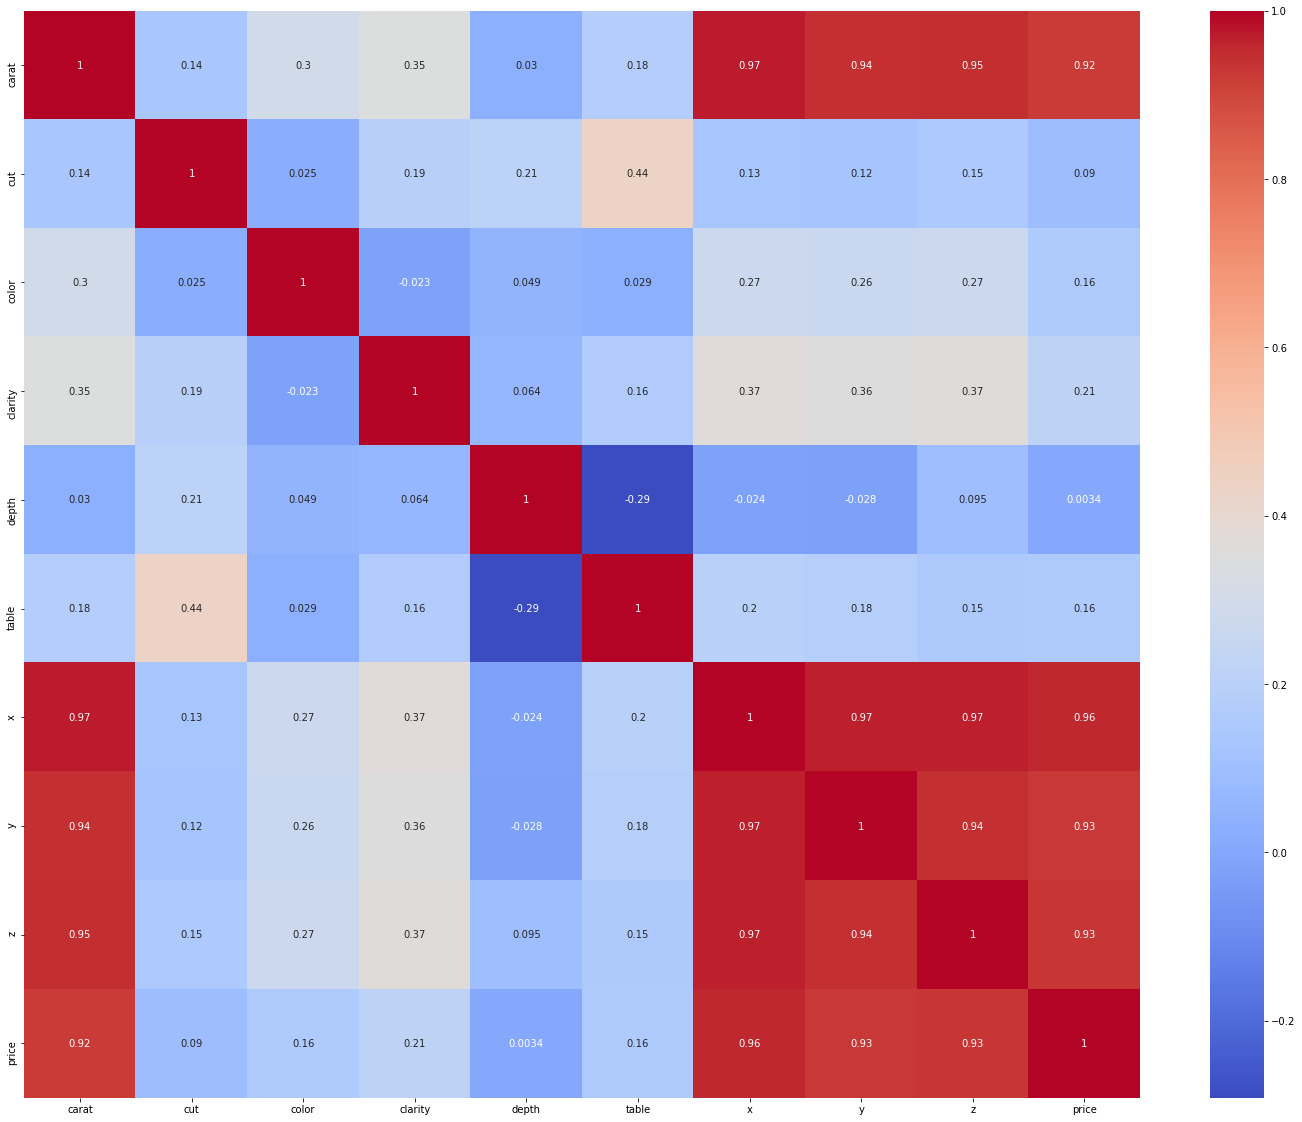

In [22]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

In [23]:
dff = df.drop(columns=['price'])

<AxesSubplot:>

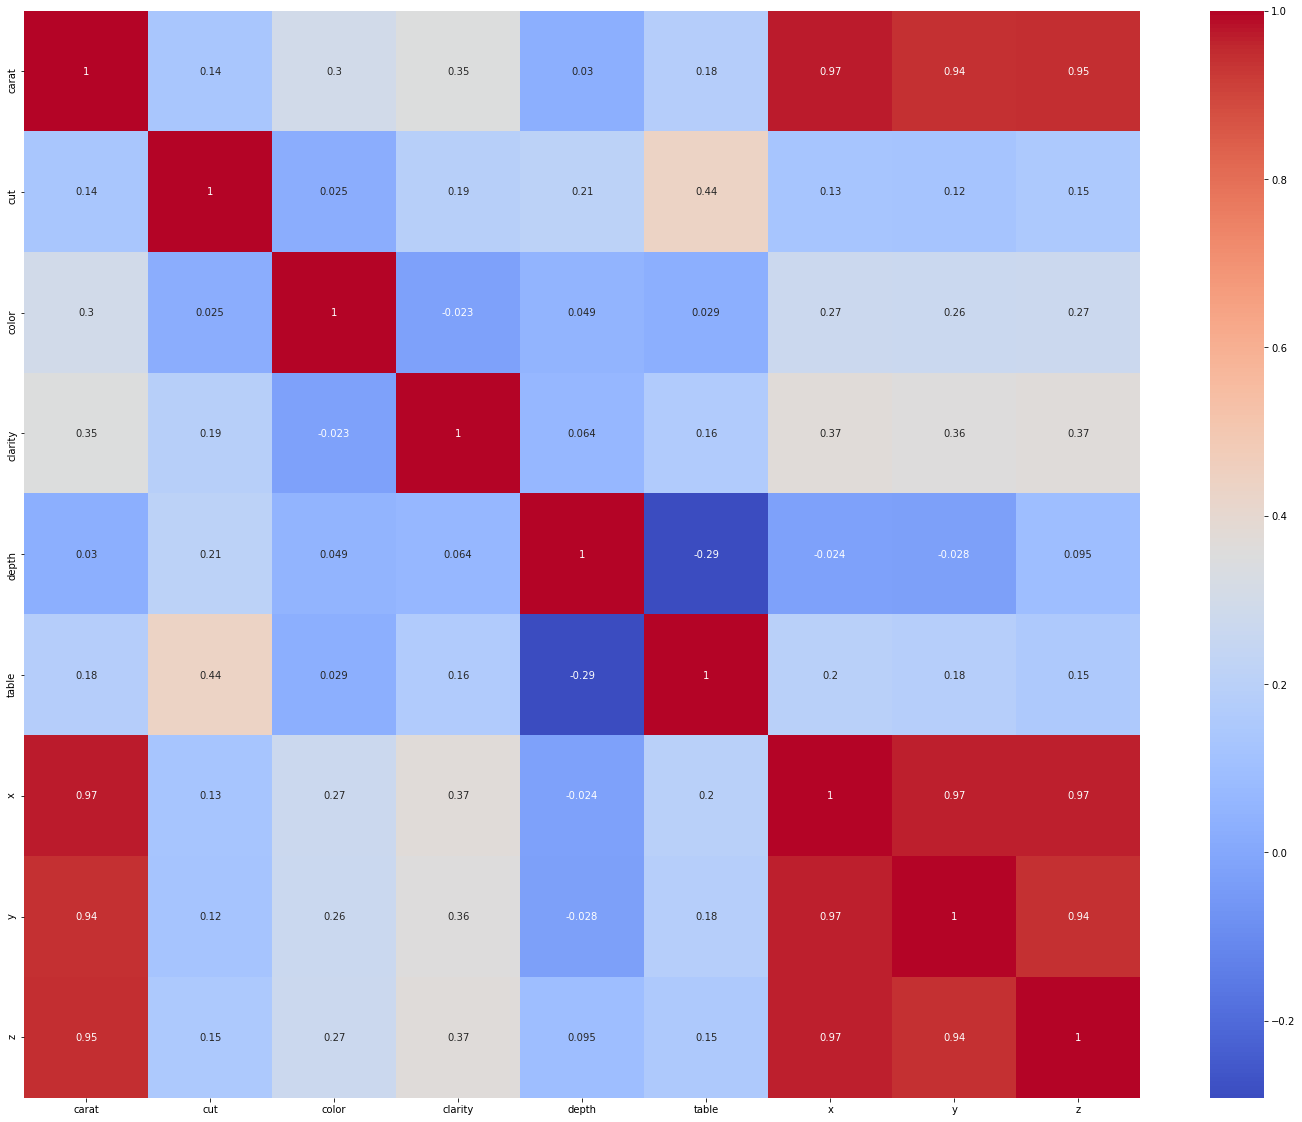

In [22]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(dff.corr(), annot = True, cmap = "coolwarm")

In [23]:
dff = dff.drop(columns=['carat'])
dff = dff.drop(columns=['y'])
dff = dff.drop(columns=['z'])

<AxesSubplot:>

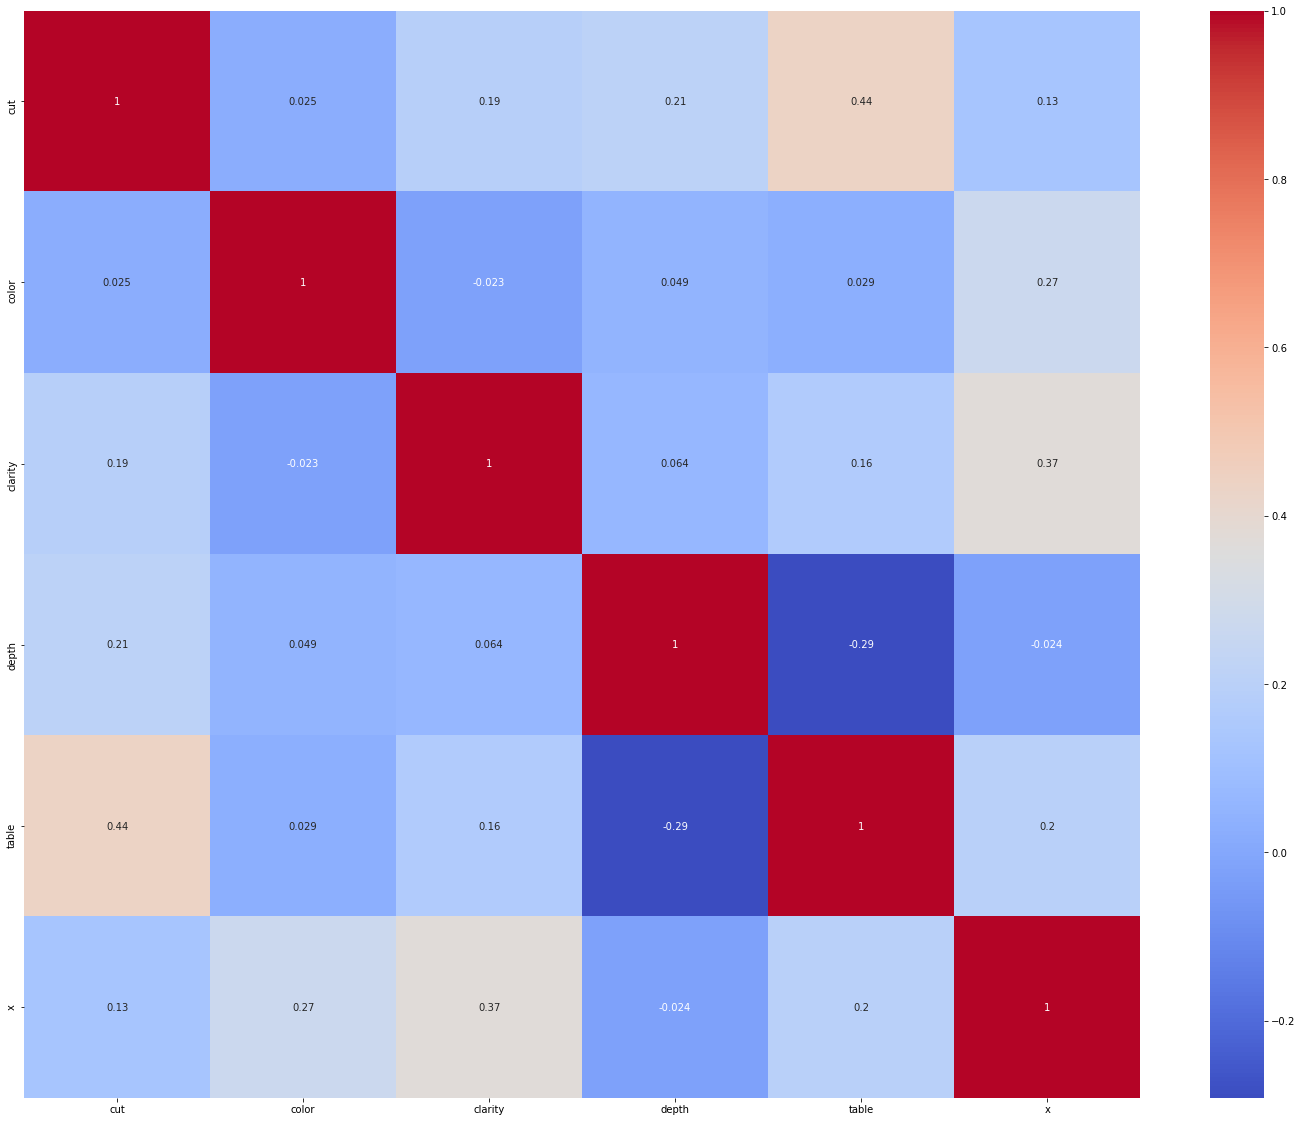

In [24]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(dff.corr(), annot = True, cmap = "coolwarm")

In [25]:
dff.head()

,cut,color,clarity,depth,table,x
0,2,4,4,62.7,58.0,6.36
1,4,4,5,64.3,57.0,5.31
2,2,5,7,59.4,59.0,7.55
3,3,7,4,63.5,58.0,4.27
4,3,3,7,62.8,57.0,6.37


In [26]:
dff.to_csv('data/features1clean.csv', index=False)

### Cleaning test

In [27]:
dftest = pd.read_csv('data/test.csv')
dftest = dftest.drop(columns=['id'])
dftest.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,2.01,Ideal,H,SI1,61.9,57.0,8.14,8.05,5.01
1,0.49,Good,D,VS1,57.5,60.0,5.18,5.25,3.00
2,1.03,Premium,F,SI1,58.6,62.0,6.65,6.60,3.88
3,0.90,Very Good,E,SI1,63.0,56.0,6.11,6.15,3.86
4,0.59,Ideal,D,SI1,62.5,55.0,5.35,5.40,3.36


In [28]:
dftest = dftest.drop(columns=['carat'])
dftest = dftest.drop(columns=['y'])
dftest = dftest.drop(columns=['z'])

In [29]:
dic_para_cut = { "Ideal":1,
                "Premium": 2,
                "Very Good": 3,
                "Good": 4,
                "Fair":5,
}

In [30]:
dftest.cut = dftest.cut.map(dic_para_cut)

In [31]:
dftest.color.unique()

array(['H', 'D', 'F', 'E', 'G', 'I', 'J'], dtype=object)

In [32]:
dic_para_color = { "G":4,
                "H": 5,
                "J": 7,
                "F": 3,
                "E":2,
                "I":6,
                "D":1,
}

In [33]:
dftest.color = dftest.color.map(dic_para_color)

In [34]:
dftest.clarity.unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS1', 'IF', 'VVS2', 'I1'],
      dtype=object)

In [35]:
dic_para_clarity = { "VS1":4,
                "VS2": 5,
                "SI2": 7,
                "IF": 1,
                "SI1":6,
                "VVS2":3,
                "VVS1":2,
                "I1": 8,
}

In [36]:
dftest.clarity = dftest.clarity.map(dic_para_clarity)

In [37]:
dftest.to_csv('data/test1clean.csv', index=False)

In [38]:
dftest

,cut,color,clarity,depth,table,x
0,1,5,6,61.9,57.0,8.14
1,4,1,4,57.5,60.0,5.18
2,2,3,6,58.6,62.0,6.65
3,3,2,6,63.0,56.0,6.11
4,1,1,6,62.5,55.0,5.35
...,...,...,...,...,...,...
13480,4,3,8,63.8,57.0,4.72
13481,3,5,5,63.5,62.0,8.05
13482,2,6,5,60.5,59.0,8.41
13483,1,2,7,58.3,62.0,5.20


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = dff
y = df.price

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### LINEAR MODEL

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred = lr.predict(X_test)

In [46]:
from sklearn import metrics

In [47]:
print("R2: ", metrics.r2_score(y_test,y_pred))

R2:  0.9595193834160494


In [48]:
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))

MSE:  0.041324838470166075


In [49]:
y_pred

array([6.70014991, 7.76328912, 9.82721495, ..., 7.77056772, 7.30503114,
       8.25223162])

In [50]:
y_pred = pd.DataFrame(data=y_pred)

In [51]:
y_pred["price"] = y_pred[0]

### TREE

In [28]:
model = DecisionTreeRegressor(max_depth=50, min_samples_split=30, max_features=6, random_state=666)

In [29]:
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [54]:
print(f"train error: {mean_squared_error(y_train, model.predict(X_train))}")
print(f"test error: {mean_squared_error(y_test, model.predict(X_test))}")

train error: 0.009007817826779983
test error: 0.015289210435048245


In [27]:
from sklearn.model_selection import GridSearchCV

In [56]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [10, 11, 12, 13, 14 ,15, 16, 17, 18, 19,20,21],
        "min_samples_split": [19,20,21,22,23,24,25, 30,31,32,33,34,35,36,37],
        "max_features": [6]
    },
    cv=6,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [58]:
gs.fit(X_train, y_train)

In [ ]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [ ]:
grid_search_results.sort_values("mean_test_score", ascending=False).head(10)

In [ ]:
best_tree = gs.best_estimator_

In [ ]:
best_tree

In [ ]:
mean_squared_error(best_tree.predict(X_test), y_test)

### Gradientboost

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
gs = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid={
        "max_depth": [7,8,9,10],
        "min_samples_split": [7,8,9,10,11,18,19,20],
        "max_features": [6],
        "n_estimators": [80]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [34]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] max_depth=7, max_features=6, min_samples_split=7, n_estimators=80 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, max_features=6, min_samples_split=7, n_estimators=80, score=(train=-0.006, test=-0.008), total=   2.4s
[CV] max_depth=7, max_features=6, min_samples_split=7, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  max_depth=7, max_features=6, min_samples_split=7, n_estimators=80, score=(train=-0.006, test=-0.007), total=   2.4s
[CV] max_depth=7, max_features=6, min_samples_split=7, n_estimators=80 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[CV]  max_depth=7, max_features=6, min_samples_split=7, n_estimators=80, score=(train=-0.006, test=-0.008), total=   2.4s
[CV] max_depth=7, max_features=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_features=6, min_samples_split=7, n_estimators=80, score=(train=-0.006, test=-0.008), total=   2.4s
[CV] max_depth=7, max_features=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_features=6, min_samples_split=7, n_estimators=80, score=(train=-0.006, test=-0.008), total=   2.5s
[CV] max_depth=7, max_features=6, min_samples_split=8, n_estimators=80 
[CV]  max_depth=7, max_features=6, min_samples_split=8, n_estimators=80, score=(train=-0.006, test=-0.008), total=   2.4s
[CV] max_depth=7, max_features=6, min_samples_split=8, n_estimators=80 
[CV]  max_depth=7, max_features=6, min_samples_split=8, n_estimators=80, score=(train=-0.006, test=-0.008), total=   2.4s
[CV] max_depth=7, max_features=6, min_samples_split=8, n_estimators=80 
[CV]  max_depth=7, max_feature

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  8.0min finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [7, 8, 9, 10], 'max_features': [6],
                         'min_samples_split': [7, 8, 9, 10, 11, 18, 19, 20],
                         'n_estimators': [80]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [35]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [36]:
grid_search_results.sort_values("mean_test_score", ascending=False).head(10)

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score
22,9,6,19,-0.007580,-0.003889
21,9,6,18,-0.007599,-0.003881
16,9,6,7,-0.007604,-0.003559
11,8,6,10,-0.007609,-0.004720
23,9,6,20,-0.007610,-0.003912
18,9,6,9,-0.007611,-0.003641
30,10,6,19,-0.007631,-0.002985
12,8,6,11,-0.007646,-0.004760
19,9,6,10,-0.007647,-0.003676
14,8,6,19,-0.007650,-0.004880


In [32]:
best_boostalldf = gs.best_estimator_

In [33]:
best_boostalldf

GradientBoostingRegressor(max_depth=9, max_features=6, min_samples_split=8)

### Creandolo sin test

In [34]:
import pickle

In [64]:
pickle.dump(best_tree, open("1tree", "wb"))

In [82]:
pickle.dump(best_tree, open("2tree05", "wb"))

In [78]:
pickle.dump(best_boost, open("2boost", "wb"))
#GradientBoostingRegressor(max_depth=12, max_features=6, min_samples_split=24)

In [35]:
pickle.dump(best_boostalldf, open("2boostalldf", "wb"))